In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn

## **Importing Dataset**

In [ ]:
import pandas as pd

# Get the path to the CSV file
csv_file_path = '/content/gdrive/My Drive/heart_disease_health_indicators_BRFSS2015.csv'

# Read the CSV file into a Pandas dataframe
df = pd.read_csv(csv_file_path)


In [ ]:
print(df.head())


   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  I

# Dataset Structure Analysis

In [ ]:
df.shape

(253680, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df.isnull().any()

HeartDiseaseorAttack    False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
Diabetes                False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

In [ ]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
print(df.count())

HeartDiseaseorAttack    253680
HighBP                  253680
HighChol                253680
CholCheck               253680
BMI                     253680
Smoker                  253680
Stroke                  253680
Diabetes                253680
PhysActivity            253680
Fruits                  253680
Veggies                 253680
HvyAlcoholConsump       253680
AnyHealthcare           253680
NoDocbcCost             253680
GenHlth                 253680
MentHlth                253680
PhysHlth                253680
DiffWalk                253680
Sex                     253680
Age                     253680
Education               253680
Income                  253680
dtype: int64


In [ ]:
print(df.mean())

HeartDiseaseorAttack     0.094186
HighBP                   0.429001
HighChol                 0.424121
CholCheck                0.962670
BMI                     28.382364
Smoker                   0.443169
Stroke                   0.040571
Diabetes                 0.296921
PhysActivity             0.756544
Fruits                   0.634256
Veggies                  0.811420
HvyAlcoholConsump        0.056197
AnyHealthcare            0.951053
NoDocbcCost              0.084177
GenHlth                  2.511392
MentHlth                 3.184772
PhysHlth                 4.242081
DiffWalk                 0.168224
Sex                      0.440342
Age                      8.032119
Education                5.050434
Income                   6.053875
dtype: float64


Age has been scaled and is not showing correct values, so we gonna scale it:

In [ ]:
df['Age'] = df['Age']*4

# T-Test

Based on **Age**

In [ ]:
heart_disease_group = df[df['HeartDiseaseorAttack'] == 1]
healthy_group = df[df['HeartDiseaseorAttack'] == 0]


In [ ]:
age_heart_disease_mean = heart_disease_group['Age'].mean()
age_healthy_mean = healthy_group['Age'].mean()


In [ ]:
print("میانگین سن افراد مبتلا به بیماری قلبی: {:.2f} سال".format(age_heart_disease_mean))
print("میانگین سن افراد سالم: {:.2f} سال".format(age_healthy_mean))

میانگین سن افراد مبتلا به بیماری قلبی: 40.52 سال
میانگین سن افراد سالم: 31.26 سال


based on **Activity**

In [ ]:
from scipy.stats import ttest_ind

group_heart_disease = df[df['HeartDiseaseorAttack'] == 1]['PhysActivity']
group_healthy = df[df['HeartDiseaseorAttack'] == 0]['PhysActivity']

t_statistic, p_value = ttest_ind(group_heart_disease, group_healthy, equal_var=False)

print("t-static: {:.2f}".format(t_statistic))
print("p-value: {:.5f}".format(p_value))


t-static: -39.75
p-value: 0.00000


# Pearson Test

based on **Activity**

In [ ]:
from scipy.stats import pearsonr

physical_activity = df['PhysActivity']
heart_disease = df['HeartDiseaseorAttack']

correlation_coefficient, p_value = pearsonr(physical_activity, heart_disease)


print("r : {:.2f}".format(correlation_coefficient))
print("p-value : {:.5f}".format(p_value))


r : -0.09
p-value : 0.00000


Based on **HighChol**

In [ ]:
from scipy.stats import pearsonr


HighChol = df['HighChol']
heart_disease = df['HeartDiseaseorAttack']

correlation_coefficient, p_value = pearsonr(HighChol, heart_disease)

print("r : {:.2f}".format(correlation_coefficient))
print("p-value : {:.5f}".format(p_value))


r : 0.18
p-value : 0.00000


# Visualization

based on **Age**

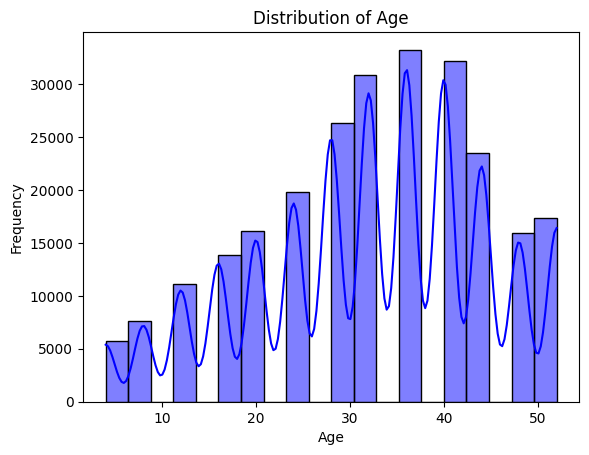

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


based on **Education**

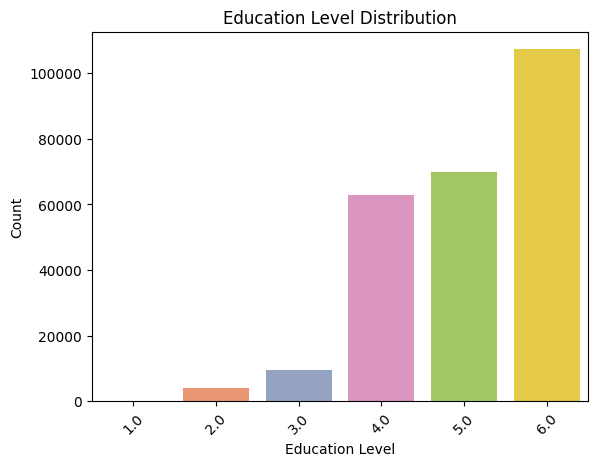

In [ ]:
sns.countplot(data=df, x='Education', palette='Set2')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show()


based on **BMI by Diabetes**

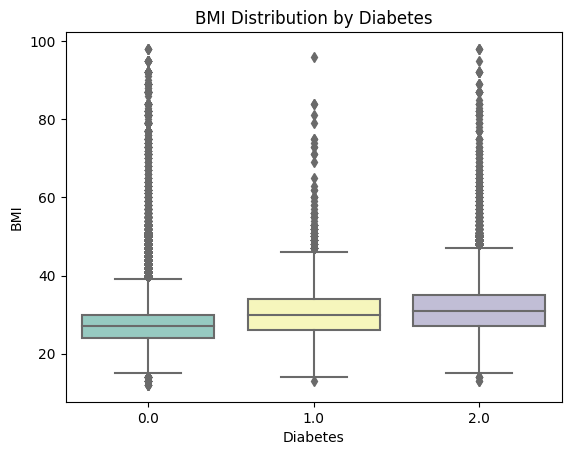

In [ ]:
sns.boxplot(data=df, x='Diabetes', y='BMI', palette='Set3')
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.title('BMI Distribution by Diabetes')
plt.show()


**Correlation Heatmap**

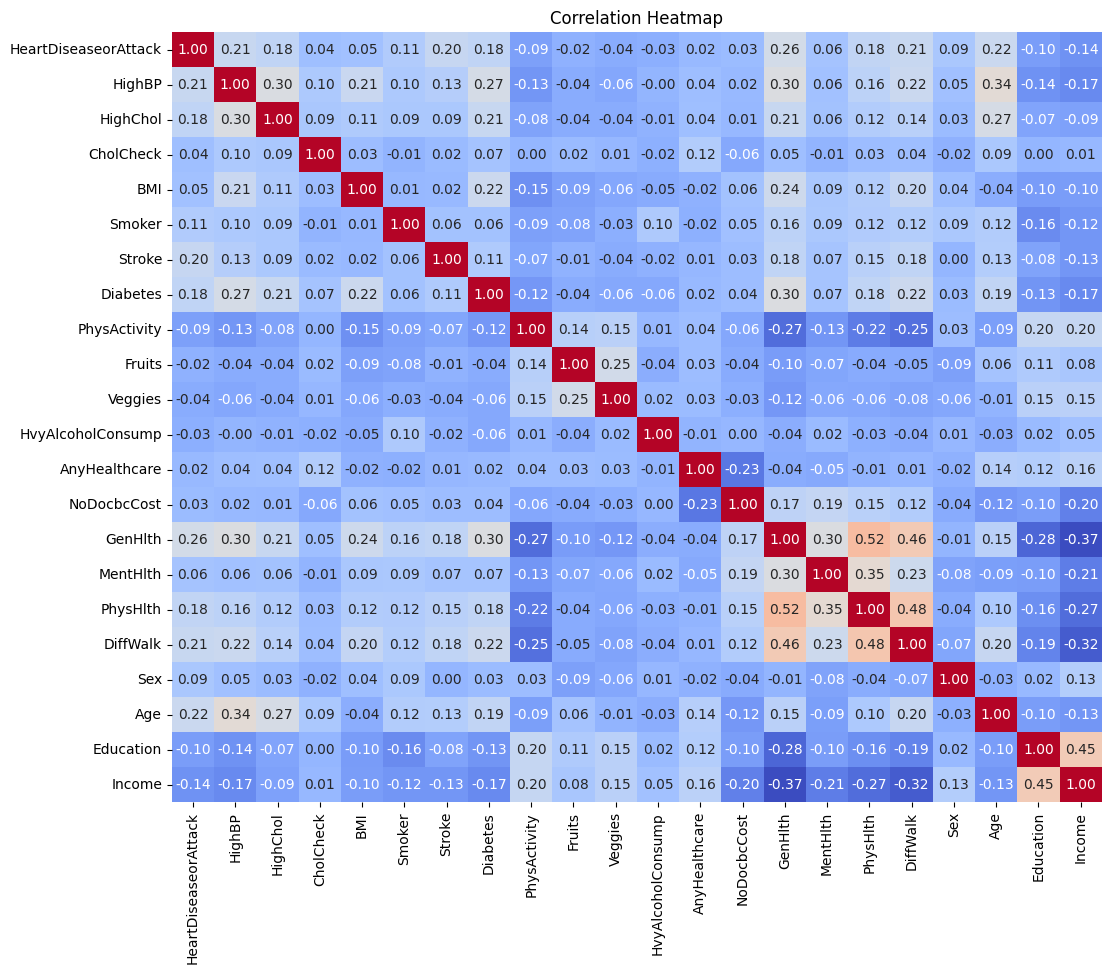

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=False)

plt.title('Correlation Heatmap')

plt.show()


**Income by Age**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


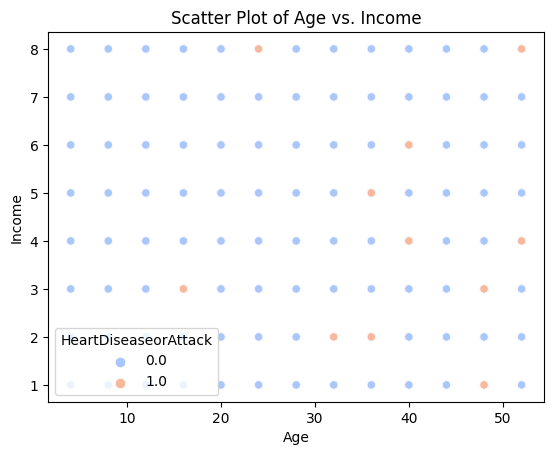

In [ ]:
sns.scatterplot(data=df, x='Age', y='Income', hue='HeartDiseaseorAttack', palette='coolwarm')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter Plot of Age vs. Income')
plt.show()


# Frequency Analysis

based on **Sex**

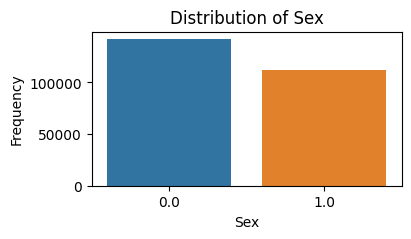

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_variable = 'Sex'
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x=categorical_variable)
plt.title(f'Distribution of {categorical_variable}')
plt.xlabel(categorical_variable)
plt.ylabel('Frequency')
plt.show()


based on **Diabetes**

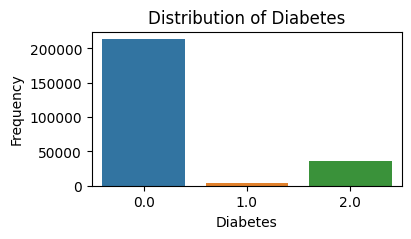

In [ ]:
categorical_variable = 'Diabetes'
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x=categorical_variable)
plt.title(f'Distribution of {categorical_variable}')
plt.xlabel(categorical_variable)
plt.ylabel('Frequency')
plt.show()

# Regression Analysis

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# انتخاب متغیرهای مستقل
independent_variables = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# تقسیم داده به دو بخش آموزش و آزمون
X = df[independent_variables]
y = df['HeartDiseaseorAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد مدل رگرسیون لجستیک
model = LogisticRegression()
model.fit(X_train, y_train)

# پیش‌بینی با استفاده از مدل
y_pred = model.predict(X_test)

# ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9064175339009776
Confusion Matrix:
[[45368   600]
 [ 4148   620]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     45968
         1.0       0.51      0.13      0.21      4768

    accuracy                           0.91     50736
   macro avg       0.71      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736

